In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
DATA_DIR="..\data\processed\dataframe.pkl"
CLUSTER_DIR=r'..\data\processed\feature_skills_clusters.pkl'
EXPORT_FEATURES_DIR='..\data\processed'
EXPORT_PATH    = "../data/processed/2_cleaned_data.pkl"

In [3]:
preprocessed_df=pd.read_pickle(DATA_DIR)
feature_clusters=pd.read_pickle(CLUSTER_DIR)

In [4]:
ROLE_COLS=["DevType"]
TECH_COLS=['LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith',
       'WebframeHaveWorkedWith',
       'MiscTechHaveWorkedWith',
       'ToolsTechHaveWorkedWith',
       'NEWCollabToolsHaveWorkedWith']

In [5]:
encoded_dfs={}
penalizer=MultiLabelBinarizer()
for col in ROLE_COLS+TECH_COLS:
   encoded_df=penalizer.fit_transform(preprocessed_df[col])
   encoded_df=pd.DataFrame(encoded_df,columns=penalizer.classes_)
   encoded_dfs[col]=encoded_df

encoded_dfs=pd.concat(encoded_dfs,axis=1)
encoded_dfs
# pd.concat(encoded_dfs,axis=1)

DevType                           \
      Academic researcher Data or business analyst   
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
83434                   0                        0   
83435                   0                        0   
83436                   0                        0   
83437                   0                        0   
83438                   0                        0   

                                                                            \
      Data scientist or machine learning specialist Database administrator   
0                                                 0                      0   
1                                                 0                      0   
2                                                 0                      0   
3                                                 0                      0   
4                                                 0                      0   
...                                             ...                    ...   
83434                                             0                      0   
83435                                             0                      0   
83436                                             1                      0   
83437                                             0                      0   
83438                                             0                      0   

                                                                            \
      Designer DevOps specialist Developer, QA or test Developer, back-end   
0            0                 0                     0                   0   
1            0                 0                     0                   0   
2            0                 0                     0                   0   
3            0                 0                     0                   0   
4            0                 0                     0                   0   
...        ...               ...                   ...                 ...   
83434        0                 0                     0                   1   
83435        0                 0                     0                   0   
83436        0                 1                     0                   0   
83437        0                 0                     0                   1   
83438        0                 0                     0                   1   

                                                     \
      Developer, desktop or enterprise applications   
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 1   
...                                             ...   
83434                                             0   
83435                                             0   
83436                                             0   
83437                                             0   
83438                                             0   

                                                   ...  \
      Developer, embedded applications or devices  ...   
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
83434                                           0  ...   
83435                                          

Sanity check

In [6]:
#original data
n=np.random.randint(preprocessed_df.shape[0])

print(preprocessed_df.loc[n][ROLE_COLS].to_list())
print(preprocessed_df.loc[n][TECH_COLS].to_list())

print("_ "*50)
mask=encoded_dfs.loc[n]==1
print(encoded_dfs.loc[n][mask].droplevel(0))

print("_ "*50)

print(feature_clusters.loc[n][feature_clusters.loc[n]==1])

[[]]
[['HTML/CSS', 'JavaScript', 'PHP', 'Python'], ['MySQL'], [], ['React.js'], [], ['Git'], ['Vim']]
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
HTML/CSS      1
JavaScript    1
PHP           1
Python        1
MySQL         1
React.js      1
Git           1
Vim           1
Name: 52801, dtype: int32
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
feature_0    1
feature_1    1
feature_3    1
Name: 52801, dtype: int64


In [7]:
encoded_dfs["DevType"].columns

Index(['Academic researcher', 'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer', 'DevOps specialist',
       'Developer, QA or test', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices', 'Developer, front-end',
       'Developer, full-stack', 'Developer, game or graphics',
       'Developer, mobile', 'Educator', 'Engineer, data',
       'Engineer, site reliability', 'Engineering manager',
       'Marketing or sales professional', 'Other (please specify):',
       'Product manager', 'Scientist', 'Senior Executive (C-Suite, VP, etc.)',
       'Student', 'System administrator'],
      dtype='object')

EXCLUDE unnecessary roles

In [8]:
EXCLUDED_ROLES=['Academic researcher',
                'Educator',
                'Marketing or sales professional',
                'Designer',
                'Other (please specify):',
                'Product manager',
                'Engineering manager',
                'Senior Executive (C-Suite, VP, etc.)',
                 'Student',
                
                ]

In [9]:
# encoded_dfs.droplevel(0,axis=1)["Academic researcher"]

In [10]:
for col in EXCLUDED_ROLES:
    encoded_dfs=encoded_dfs.drop(('DevType',col),axis=1)
    # print(encoded_dfs['DevType'][col].shape)

In [11]:
encoded_dfs["DevType"].columns

Index(['Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'DevOps specialist', 'Developer, QA or test',
       'Developer, back-end', 'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices', 'Developer, front-end',
       'Developer, full-stack', 'Developer, game or graphics',
       'Developer, mobile', 'Engineer, data', 'Engineer, site reliability',
       'Scientist', 'System administrator'],
      dtype='object')

In [12]:
roles_frequancy=encoded_dfs["DevType"].sum(axis=1).sort_values()
roles_frequancy



41719     0
63501     0
63502     0
44624     0
63504     0
         ..
43854    16
28993    16
78362    16
39471    16
61876    16
Length: 83439, dtype: int64

<Axes: ylabel='Count'>

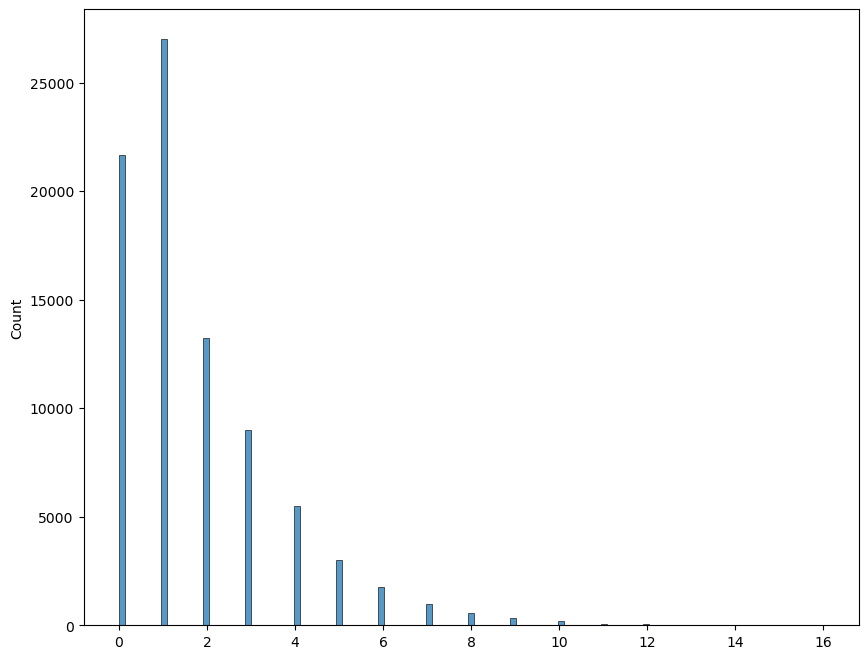

In [13]:
plt.figure(figsize=(10,8))
sns.histplot(roles_frequancy)

<Axes: ylabel='Count'>

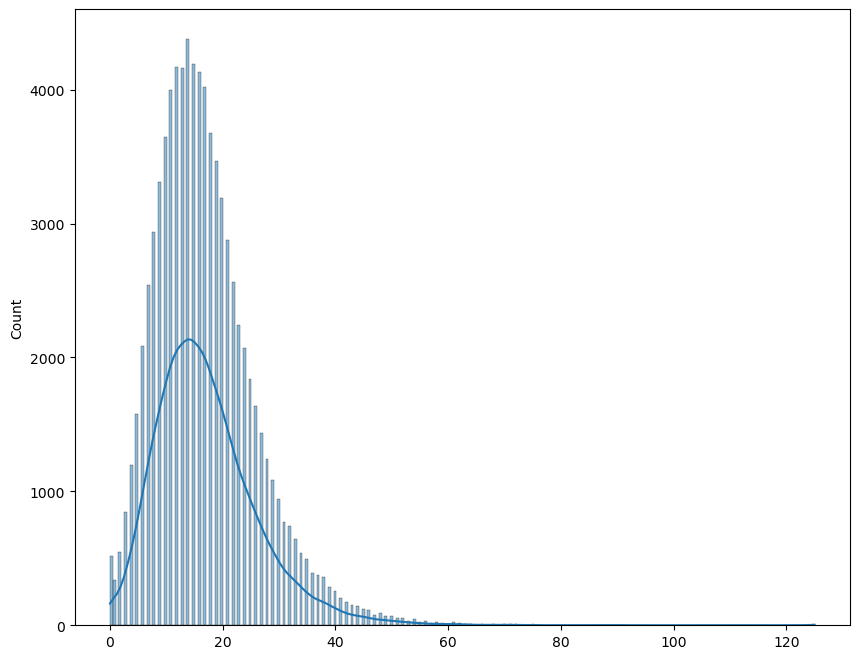

In [14]:
skills_frequancy=encoded_dfs.drop("DevType",axis=1).sum(axis=1).sort_values()
plt.figure(figsize=(10,8))
sns.histplot(skills_frequancy,kde=True)

In [15]:
roles_range=[1,3]
skills_range=[3,30]
new_mask_roles=(roles_frequancy>=roles_range[0]) & (roles_frequancy<=roles_range[1])
new_mask_skills=(skills_frequancy>=skills_range[0])&(skills_frequancy<=skills_range[1])
new_mask_skills.sum()

75461

In [16]:
new_mask=(new_mask_roles & new_mask_skills)
df_new=encoded_dfs.loc[new_mask]
df_new
feature_clusters=feature_clusters.loc[new_mask]
feature_clusters={'feature_clusters':feature_clusters}
feature_clusters=pd.concat(feature_clusters,axis=1)


In [17]:
feature_clusters

feature_clusters                                                        \
             feature_0 feature_1 feature_10 feature_11 feature_12 feature_13   
0                    0         1          0          0          0          0   
3                    0         0          0          0          0          0   
4                    4         4          0          0          0          0   
8                    2         3          0          0          0          0   
9                    6         2          0          0          0          0   
...                ...       ...        ...        ...        ...        ...   
83434                0         2          0          0          0          2   
83435                1         2          2          0          0          0   
83436                6         6          0          0          0          2   
83437                7         5          0          0          0          0   
83438                0         3          0          0          0          3   

                                                                         \
      feature_14 feature_15 feature_16 feature_17 feature_18 feature_19   
0              0          0          0          0          0          2   
3              2          0          0          0          0          0   
4              0          0          0          2          1          0   
8              0          0          0          0          0          0   
9              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
83434          0          0          0          0          0          0   
83435          0          1          2          0          0          0   
83436          0          0          0          1          0          0   
83437          0          0          0          0          1          0   
83438          1          0          0          0          0          0   

                                                                             \
      feature_2 feature_3 feature_4 feature_5 feature_6 feature_7 feature_8   
0             0         0         4         0         0         2         0   
3             0         0         0         0         0         2         0   
4             1         1         0         0         2         1         0   
8             0         0         0         0         0         2         0   
9             0         0         0         0         0         0         0   
...         ...       ...       ...       ...       ...       ...       ...   
83434         1         0         1         1         0         0         0   
83435         0         1         4         0         1         1         0   
83436         0         1         0         0         2         0         0   
83437         0         4         0         0         3         1         0   
83438         0         0         0         1         0         2         1   

                 
      feature_9  
0             1  
3             0  
4             0  
8             0  
9             1  
...         ...  
83434         0  
83435         1  
83436         0  
83437         0  
83438         0  

[46012 rows x 20 columns]

In [18]:
cleaned_role_sum = df_new["DevType"].sum(axis=0)
cleaned_role_sum

Data or business analyst                          1699
Data scientist or machine learning specialist     2591
Database administrator                            1174
DevOps specialist                                 2874
Developer, QA or test                             1113
Developer, back-end                              16977
Developer, desktop or enterprise applications     4863
Developer, embedded applications or devices       2162
Developer, front-end                              8938
Developer, full-stack                            20620
Developer, game or graphics                        919
Developer, mobile                                 4766
Engineer, data                                    1945
Engineer, site reliability                         890
Scientist                                         1191
System administrator                              1978
dtype: int64

In [19]:
df=pd.concat([df_new,feature_clusters],axis=1)
df

DevType                                                \
      Data or business analyst Data scientist or machine learning specialist   
0                            0                                             0   
3                            0                                             0   
4                            0                                             0   
8                            0                                             0   
9                            0                                             1   
...                        ...                                           ...   
83434                        0                                             0   
83435                        0                                             0   
83436                        0                                             1   
83437                        0                                             0   
83438                        0                                             0   

                                                                      \
      Database administrator DevOps specialist Developer, QA or test   
0                          0                 0                     0   
3                          0                 0                     0   
4                          0                 0                     0   
8                          0                 0                     0   
9                          0                 0                     0   
...                      ...               ...                   ...   
83434                      0                 0                     0   
83435                      0                 0                     0   
83436                      0                 1                     0   
83437                      0                 0                     0   
83438                      0                 0                     0   

                                                                         \
      Developer, back-end Developer, desktop or enterprise applications   
0                       0                                             0   
3                       0                                             0   
4                       0                                             1   
8                       0                                             0   
9                       0                                             0   
...                   ...                                           ...   
83434                   1                                             0   
83435                   0                                             0   
83436                   0                                             0   
83437                   1                                             0   
83438                   1                                             0   

                                                                        \
      Developer, embedded applications or devices Developer, front-end   
0                                               0                    0   
3                                               0                    1   
4                                               0                    0   
8                                               0                    1   
9                                               0                    0   
...                                           ...                  ...   
83434                                           0                    0   
83435                                           0                    0   
83436                                           0                    0   
83437                                           0                    0   
83438                                           0                    1   

                             ... feature_clusters                       \
      Developer, full-stack  ...

In [20]:
df.to_pickle(EXPORT_PATH)